/home/xlpy/.pyenv/versions/3.8.5/envs/carcrash/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (24,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


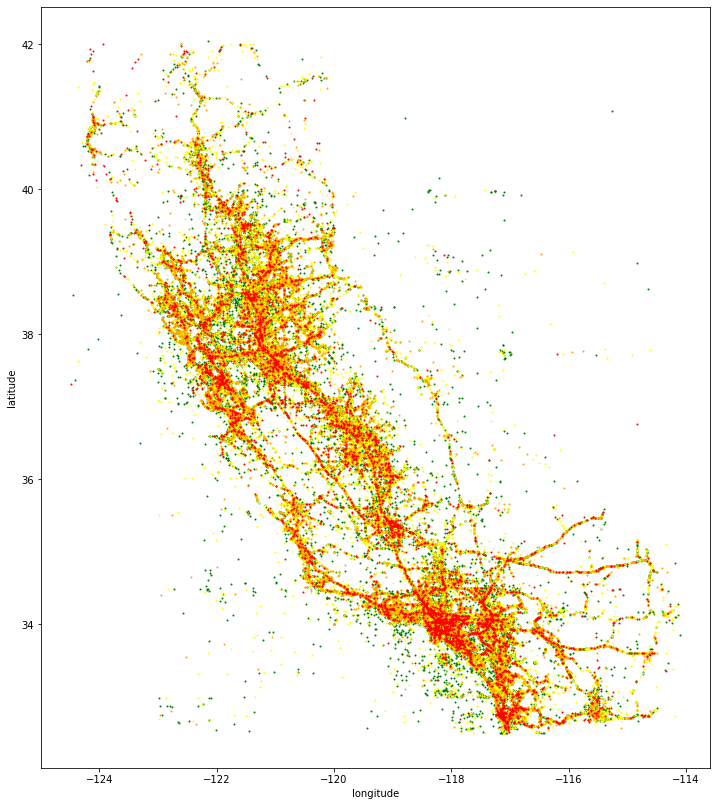

In [7]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

coll = pd.read_csv('collisions.csv',nrows=2_000_000)

df = coll.copy()[['latitude','longitude','collision_severity']].dropna().reset_index()

#df.collision_severity.value_counts()

severity = {'property damage only':1,'pain':2,'other injury':3,'severe injury':4,'fatal':5}
df['severity_code'] = df.collision_severity.apply(lambda x : severity[x])
#df.head()

fig, ax = plt.subplots()
colors = ['white','green','yellow','orange','red']
for i in severity.values():
    df[df.severity_code == i].plot.scatter(x='longitude', y='latitude',ax=ax,figsize=(12,14),c=colors[i-1],s=1)